This notebook is for analysing differences in TSFFD and Vxm derived strains

Using Bland Altman plot to identify whether there is systatimc difference between strain maesurements

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
from matplotlib.patches import Patch
from matplotlib.lines import Line2D

from hrs_23_figures import *

from sklearn import metrics

In [2]:
regions = ['global', 'roof', 'sept', 'lat', 'ant', 'post']
all_cases = nonaf_cases + af_cases

In [14]:
fibre_strain_range?

In [15]:
## Loading reservoir strains

## Initiliase data structures

## N_case X N_region X N_strain_metric
strain_TSFFD = np.zeros((len(nonaf_cases)+len(af_cases), len(regions), 3))
strain_Vxm = np.zeros((len(nonaf_cases)+len(af_cases), len(regions), 3))

arch='endo_avg'
components=[0, 1]

localDataPath="/home/csi20local/Data/RG_CT_Cases"

for i in range(0, len(nonaf_cases)+len(af_cases)):
    case=all_cases[i]
    
    for j in range(0, len(regions)):
        region = regions[j]
        
        ## Load area strains
        strain_TSFFD[i, j, 0] = area_strain_range(case, "area", region)
        strain_Vxm[i, j, 0] = area_strain_range_Vxm(case, "area", region)
        
        for k in range(0, 2):
            
            ## Load fibre strains
            strain_TSFFD[i, j, k+1] = fibre_strain_range(case, arch, k, region)
            strain_Vxm[i, j, k+1] = fibre_strain_range_Vxm(case, arch, k, region)

In [56]:
def bland_altman_plot_ax(data1, data2, ax, *args, **kwargs):
    data1     = np.asarray(data1)
    data2     = np.asarray(data2)
    mean      = np.mean([data1, data2], axis=0)
    diff      = data1 - data2                   # Difference between data1 and data2
    md        = np.mean(diff)                   # Mean of the difference
    sd        = np.std(diff, axis=0)            # Standard deviation of the difference

    ax.scatter(mean, diff, *args, **kwargs)
    ax.axhline(md,           color='gray', linestyle='--')
    ax.axhline(md + 1.96*sd, color='gray', linestyle='--')
    ax.axhline(md - 1.96*sd, color='gray', linestyle='--')
    
    ax.set_ylabel("Difference between\nMeasurements", fontsize=12)
    ax.set_xlabel("Average of Measurements", fontsize=12)
    
def bland_altman_plot_no_horzlines_ax(data1, data2, ax, *args, **kwargs):
    data1     = np.asarray(data1)
    data2     = np.asarray(data2)
    mean      = np.mean([data1, data2], axis=0)
    diff      = data1 - data2                   # Difference between data1 and data2
    md        = np.mean(diff)                   # Mean of the difference
    sd        = np.std(diff, axis=0)            # Standard deviation of the difference

    ax.scatter(mean, diff, *args, **kwargs)
    
    ax.set_ylabel("Difference between\nMeasuremnts", fontsize=12)
    ax.set_xlabel("Average of Measurements", fontsize=12)

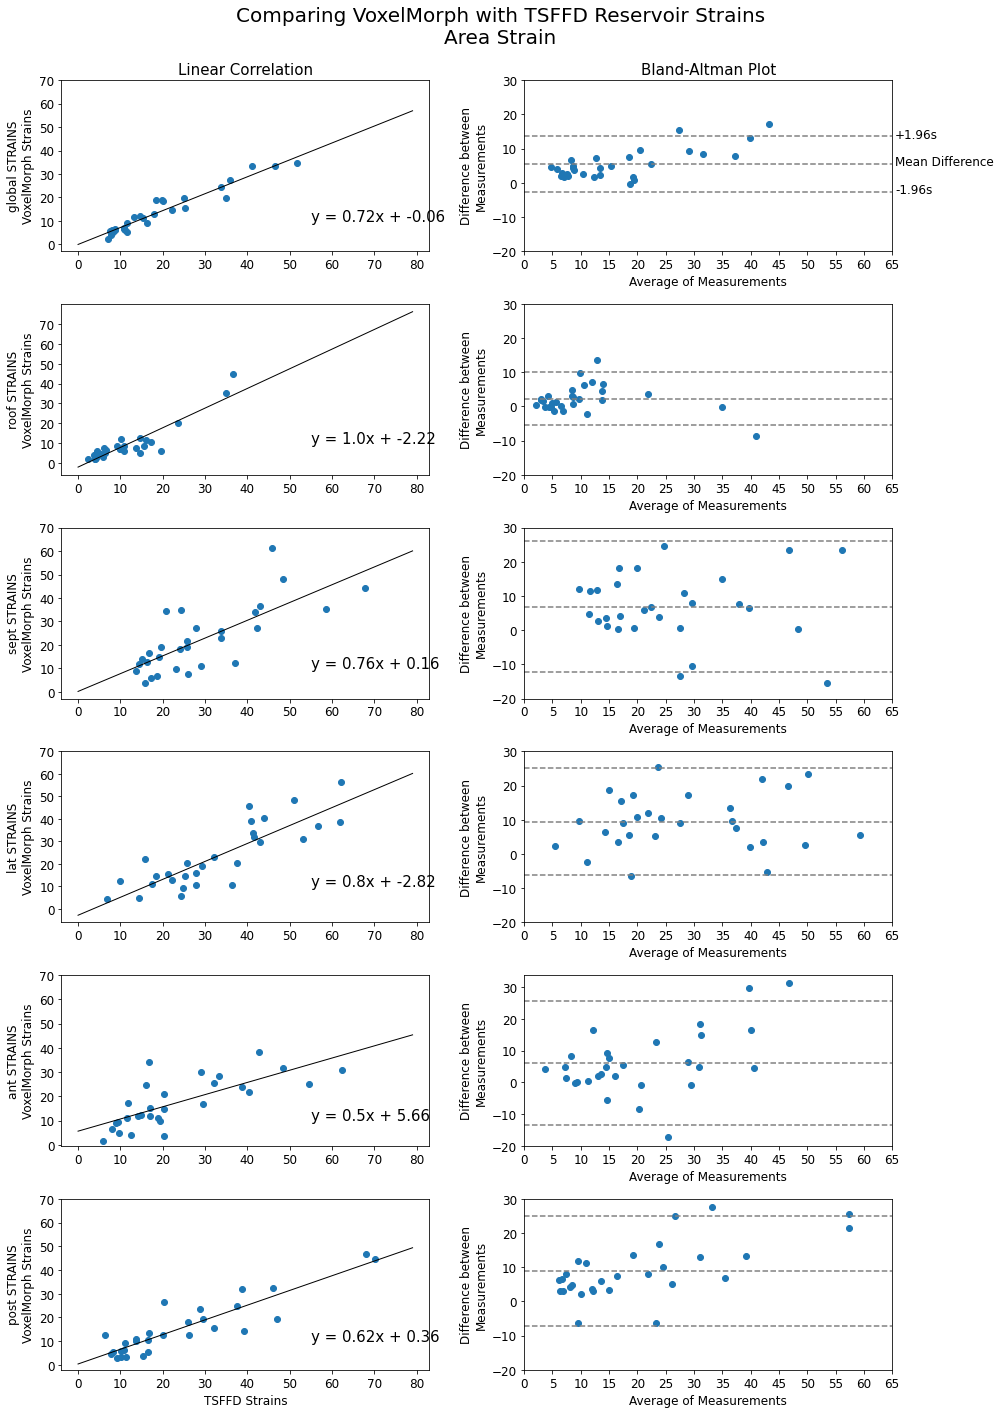

In [103]:
fig, ((ax1, ax2),
      (ax3, ax4),
      (ax5, ax6),
      (ax7, ax8),
      (ax9, ax10),
      (ax11, ax12)) = plt.subplots(6, 2, figsize=(14,20))

for i in range(0, len(regions)):
    ## B-A Plot
    bland_altman_plot_ax(strain_TSFFD[:, i, 0].flatten(), strain_Vxm[:, i, 0].flatten(), ax=fig.axes[i*2+1])
    
    ## Scatter plot with line of best fit
    fig.axes[i*2].scatter(strain_TSFFD[:, i, 0].flatten(), strain_Vxm[:, i, 0].flatten())
    
    a, b = np.polyfit(strain_TSFFD[:, i, 0].flatten(), strain_Vxm[:, i, 0].flatten(), 1)
    x = np.arange(0, 80)
    fig.axes[i*2].plot(x, a*x+b, c='black', lw=1)
    fig.axes[i*2].text(55, 10, f"y = {np.round(a,2)}x + {np.round(b,2)}", fontsize=15)
    
    ## Size of ticks
    fig.axes[i*2].tick_params(axis='both', labelsize=12)
    fig.axes[i*2+1].tick_params(axis='both', labelsize=12)
    
    fig.axes[i*2].set_ylabel(f"{regions[i]} STRAINS\nVoxelMorph Strains", fontsize=12)
    
    fig.axes[i*2+1].set_yticks(np.arange(-20, 31, 10))
    fig.axes[i*2+1].set_xticks(np.arange(0, 66, 5))
    fig.axes[i*2].set_yticks(np.arange(0, 80, 10))

ax11.set_xlabel("TSFFD Strains", fontsize=12)

ax1.set_title("Linear Correlation", fontsize=15)
ax2.set_title("Bland-Altman Plot", fontsize=15)

ax2.text(65.5, 5, "Mean Difference", fontsize=12)
ax2.text(65.5, 13, "+1.96s", fontsize=12)
ax2.text(65.5, -3, "-1.96s", fontsize=12)

# ax1.set_xticks(np.arange(0, 100, 20))
# ax1.set_yticks(np.arange(0, 60, 10))

fig.suptitle("Comparing VoxelMorph with TSFFD Reservoir Strains\nArea Strain\n", fontsize=20)

plt.tight_layout()

# plt.savefig("/home/csi20/Dropbox/phd/Documents/P1/final_figs_vxm/bland_altman_area.png", 
#            dpi=200, bbox_inches="tight")

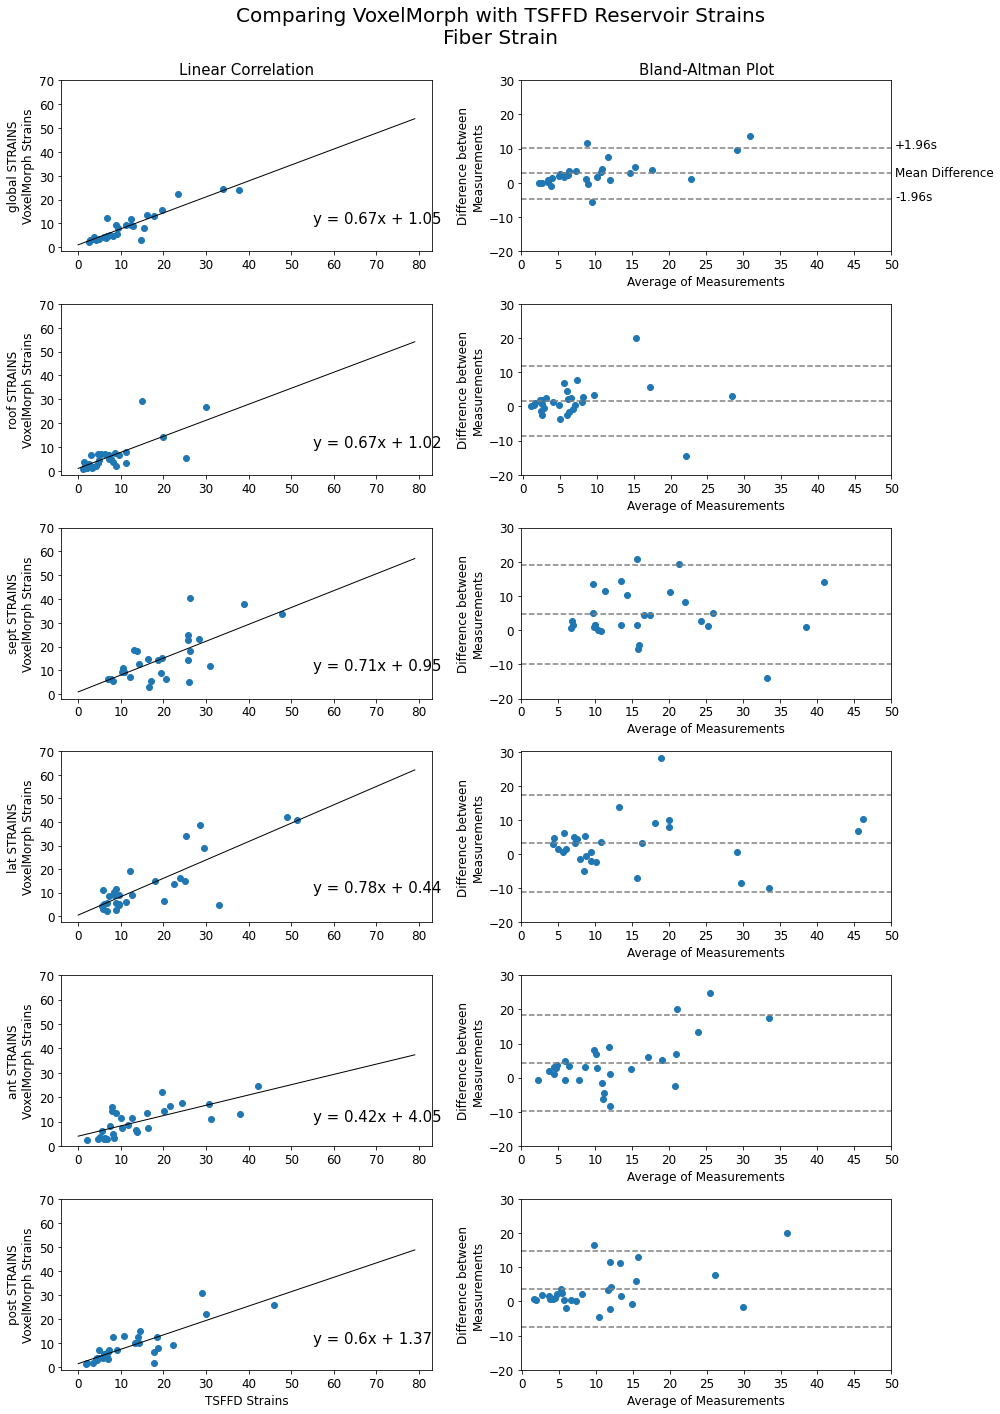

In [104]:
fig, ((ax1, ax2),
      (ax3, ax4),
      (ax5, ax6),
      (ax7, ax8),
      (ax9, ax10),
      (ax11, ax12)) = plt.subplots(6, 2, figsize=(14,20))

for i in range(0, len(regions)):
    ## B-A Plot
    bland_altman_plot_ax(strain_TSFFD[:, i, 1].flatten(), strain_Vxm[:, i, 1].flatten(), ax=fig.axes[i*2+1])
    
    ## Scatter plot with line of best fit
    fig.axes[i*2].scatter(strain_TSFFD[:, i, 1].flatten(), strain_Vxm[:, i, 1].flatten())
    
    a, b = np.polyfit(strain_TSFFD[:, i, 1].flatten(), strain_Vxm[:, i, 1].flatten(), 1)
    x = np.arange(0, 80)
    fig.axes[i*2].plot(x, a*x+b, c='black', lw=1)
    fig.axes[i*2].text(55, 10, f"y = {np.round(a,2)}x + {np.round(b,2)}", fontsize=15)
    
    ## Size of ticks
    fig.axes[i*2].tick_params(axis='both', labelsize=12)
    fig.axes[i*2+1].tick_params(axis='both', labelsize=12)
    
    fig.axes[i*2].set_ylabel(f"{regions[i]} STRAINS\nVoxelMorph Strains", fontsize=12)
    
    fig.axes[i*2+1].set_yticks(np.arange(-20, 31, 10))
    fig.axes[i*2+1].set_xticks(np.arange(0, 51, 5))
    fig.axes[i*2].set_yticks(np.arange(0, 80, 10))

ax11.set_xlabel("TSFFD Strains", fontsize=12)

ax1.set_title("Linear Correlation", fontsize=15)
ax2.set_title("Bland-Altman Plot", fontsize=15)

ax2.text(50.5, 2, "Mean Difference", fontsize=12)
ax2.text(50.5, 10, "+1.96s", fontsize=12)
ax2.text(50.5, -5, "-1.96s", fontsize=12)

# ax1.set_xticks(np.arange(0, 100, 20))
# ax1.set_yticks(np.arange(0, 60, 10))

fig.suptitle("Comparing VoxelMorph with TSFFD Reservoir Strains\nFiber Strain\n", fontsize=20)

plt.tight_layout()

# plt.savefig("/home/csi20/Dropbox/phd/Documents/P1/final_figs_vxm/bland_altman_fiber.png", 
#            dpi=200, bbox_inches="tight")

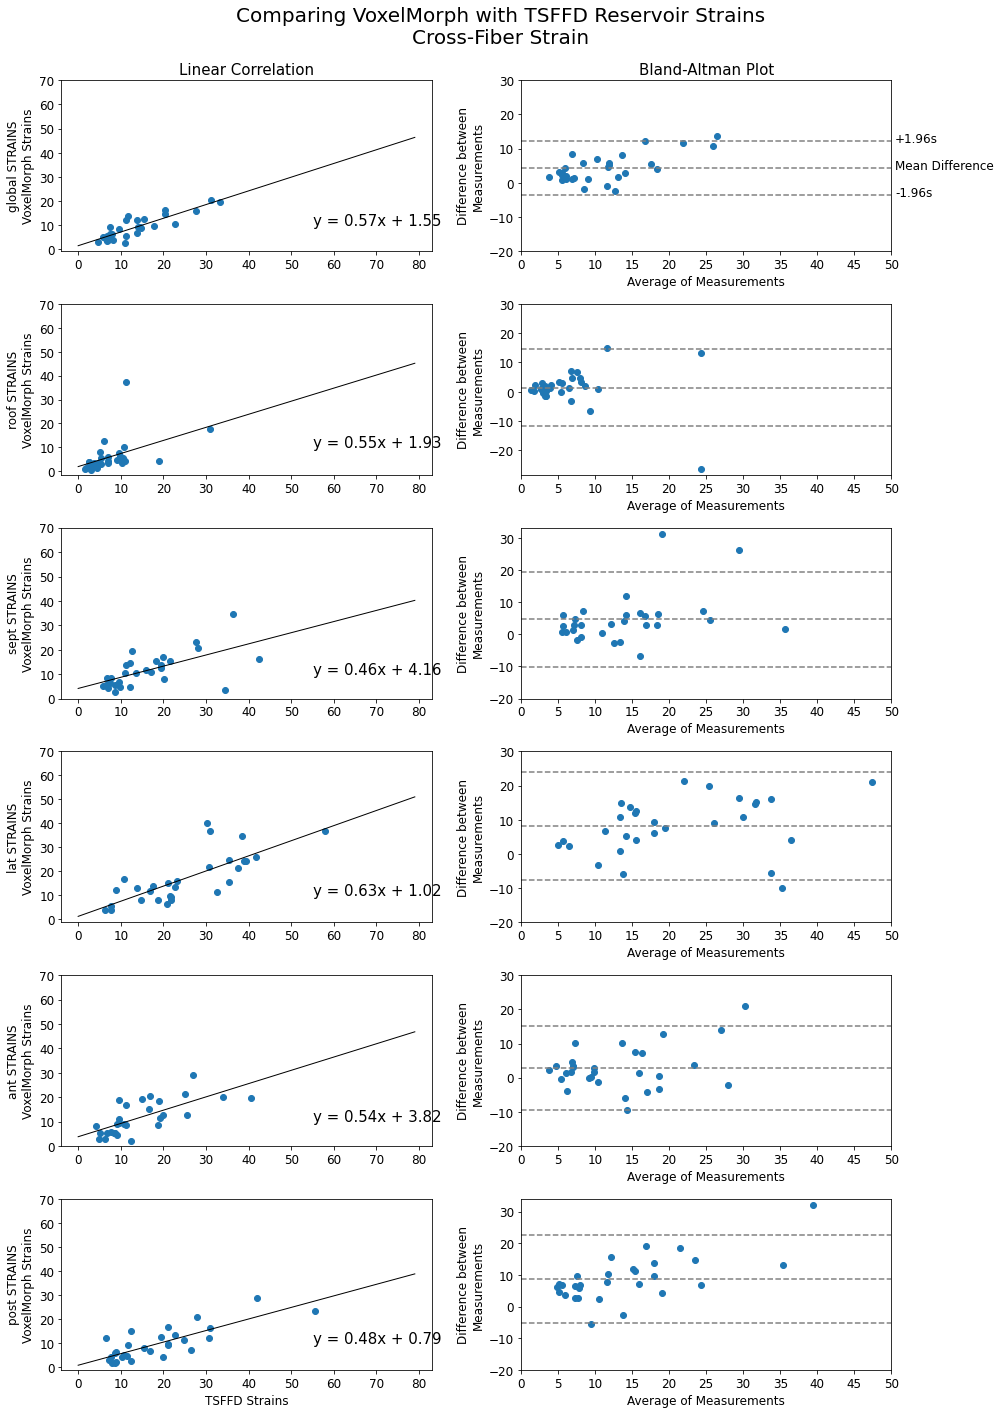

In [111]:
fig, ((ax1, ax2),
      (ax3, ax4),
      (ax5, ax6),
      (ax7, ax8),
      (ax9, ax10),
      (ax11, ax12)) = plt.subplots(6, 2, figsize=(14,20))

for i in range(0, len(regions)):
    ## B-A Plot
    bland_altman_plot_ax(strain_TSFFD[:, i, 2].flatten(), strain_Vxm[:, i, 2].flatten(), ax=fig.axes[i*2+1])
    
    ## Scatter plot with line of best fit
    fig.axes[i*2].scatter(strain_TSFFD[:, i, 2].flatten(), strain_Vxm[:, i, 2].flatten())
    
    a, b = np.polyfit(strain_TSFFD[:, i, 2].flatten(), strain_Vxm[:, i, 2].flatten(), 1)
    x = np.arange(0, 80)
    fig.axes[i*2].plot(x, a*x+b, c='black', lw=1)
    fig.axes[i*2].text(55, 10, f"y = {np.round(a,2)}x + {np.round(b,2)}", fontsize=15)
    
    ## Size of ticks
    fig.axes[i*2].tick_params(axis='both', labelsize=12)
    fig.axes[i*2+1].tick_params(axis='both', labelsize=12)
    
    fig.axes[i*2].set_ylabel(f"{regions[i]} STRAINS\nVoxelMorph Strains", fontsize=12)
    
    fig.axes[i*2+1].set_yticks(np.arange(-20, 31, 10))
    fig.axes[i*2+1].set_xticks(np.arange(0, 51, 5))
    fig.axes[i*2].set_yticks(np.arange(0, 80, 10))

ax11.set_xlabel("TSFFD Strains", fontsize=12)

ax1.set_title("Linear Correlation", fontsize=15)
ax2.set_title("Bland-Altman Plot", fontsize=15)

ax2.text(50.5, 4, "Mean Difference", fontsize=12)
ax2.text(50.5, 12, "+1.96s", fontsize=12)
ax2.text(50.5, -4, "-1.96s", fontsize=12)

# ax1.set_xticks(np.arange(0, 100, 20))
# ax1.set_yticks(np.arange(0, 60, 10))

fig.suptitle("Comparing VoxelMorph with TSFFD Reservoir Strains\nCross-Fiber Strain\n", fontsize=20)

plt.tight_layout()

# plt.savefig("/home/csi20/Dropbox/phd/Documents/P1/final_figs_vxm/bland_altman_crossfiber.png", 
#            dpi=200, bbox_inches="tight")

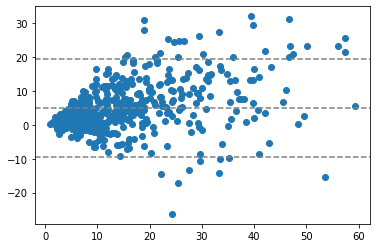

In [22]:
bland_altman_plot(strain_TSFFD[:, :, :].flatten(), strain_Vxm[:, :, :].flatten())

plt.